# This is heart disease predection project

# 1-problem defination
# 2-data
# 3-Evaluate
# 4-features
# 5-modelling
# 6-Experimentation

# 1-problem defination
We need to predict on the basis of given data wather someone have heart disease or not

# 2-data
We have data and already loaded it

# 3-Evaluate
  In initial stages we need to make sure if our model gave us the accuracy of 95%

# 4-Features
What features are important, and what features column means what.

14 of 14 columns

age: Age

sex: Sex

cp: Chest pain (typical, asymptotic, nonanginal, nontypical)

trestbps:
Resting blood pressure

chol:
Serum cholestoral in mg/dl

fbs:
Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg:
Resting electrocardiographic results

thalach:
Maximum heart rate achieved

exang:
Exercise induced angina (1 = yes; 0 = no)

oldpeak:
ST depression induced by exercise relative to rest

slope:
Slope of the peak exercise ST segment

ca:
Number of major vessels colored by flourosopy (0 - 3)

thal:
3 = normal; 6 = fixed defect; 7 = reversable defect)

target:
AHD - Diagnosis of heart disease (1 = yes; 0 = no)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing model of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# import evaluation libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Exploring the data initial stage
1-what problem i am going to solve.
2-what kind of data i have.
3-does this data have missing values.
4-are there any outlier, sporious vectors
5-can we add or remove some of the features.

In [9]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

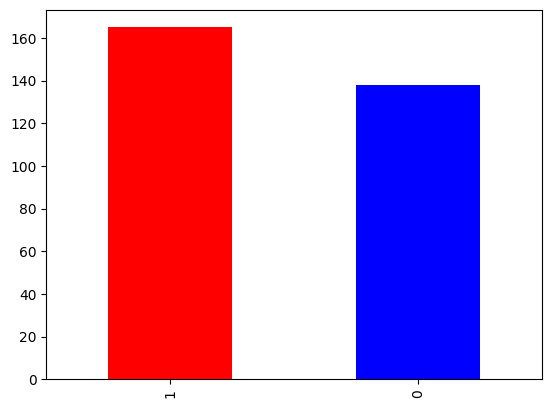

In [ ]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [ ]:
df.isna().sum() #Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
len(df)

303

In [ ]:
207/303

0.6831683168316832

In [ ]:
96/303

0.31683168316831684

In [ ]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [ ]:
72/96

0.75

In [ ]:
93/207

0.4492753623188406

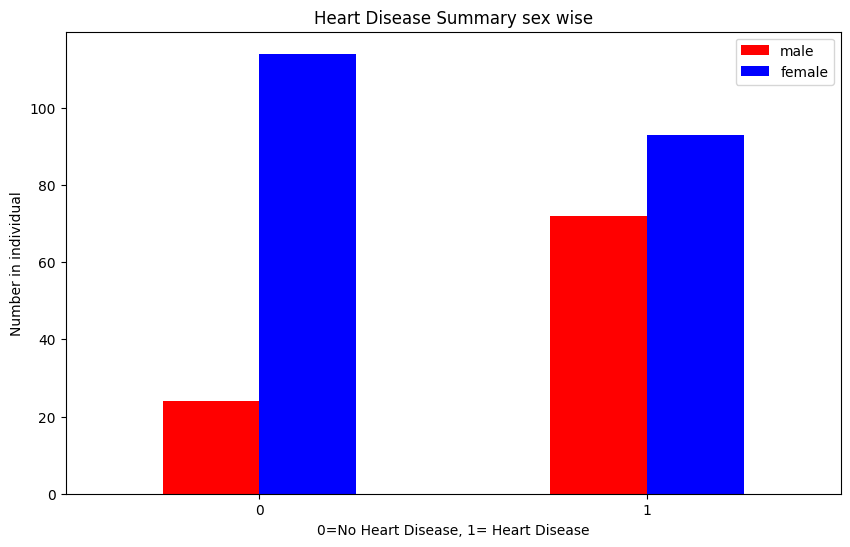

In [16]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                figsize=(10, 6),
                                color=["red","blue"])
plt.title("Heart Disease Summary sex wise")
plt.xlabel("0=No Heart Disease, 1= Heart Disease")
plt.ylabel("Number in individual")
plt.legend(["male", "female"])
plt.xticks(rotation=0);

In [17]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

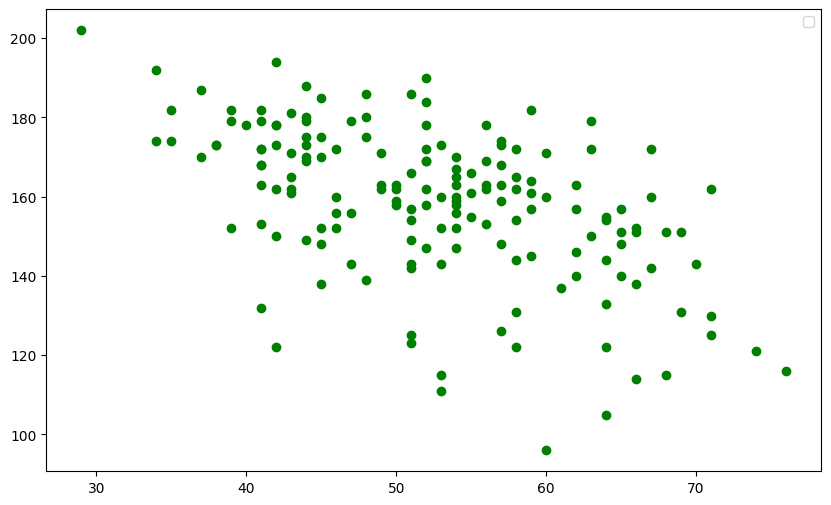

In [28]:
# finding pattern in data using scatter plot
plt.figure(figsize=(10, 6))
# create scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="green")
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.legend("");

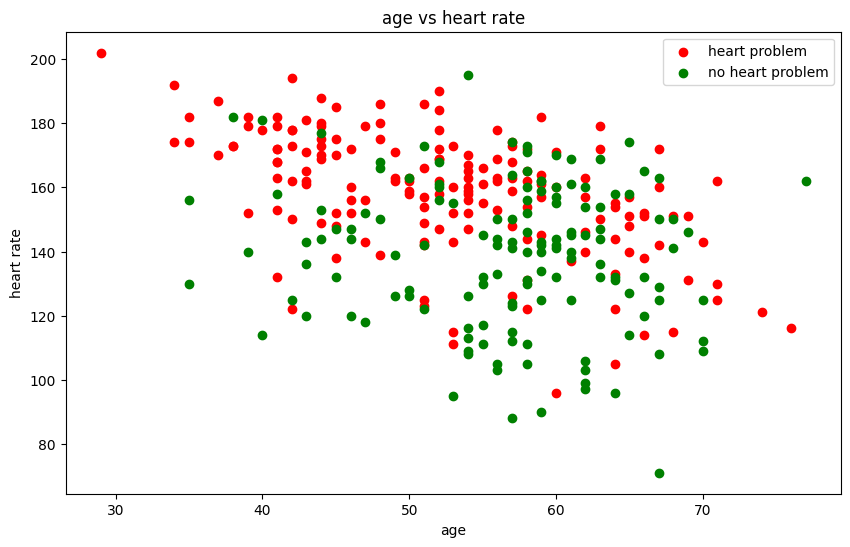

In [34]:
# finding pattern in data using scatter plot
plt.figure(figsize=(10, 6))
# create scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green")
plt.title("age vs heart rate")
plt.xlabel("age")
plt.ylabel("heart rate")
plt.legend(["heart problem", "no heart problem"]);

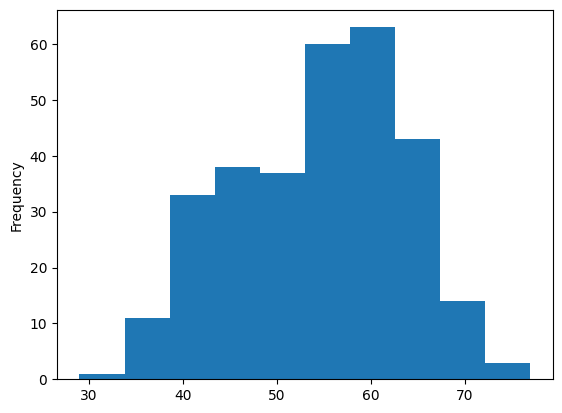

In [37]:
# create histogram to see age distribution
df.age.plot.hist();

In [38]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64